In [57]:
import pandas as pd

url = 'https://raw.githubusercontent.com/CostatoMarco/ProgettoML/main/neo.csv'
df = pd.read_csv(url,index_col=0)
print(len(df))
df.head(5) 

90836


,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
id,,,,,,,,,
2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [58]:
df.dtypes

name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

## Esplorazione Parametri

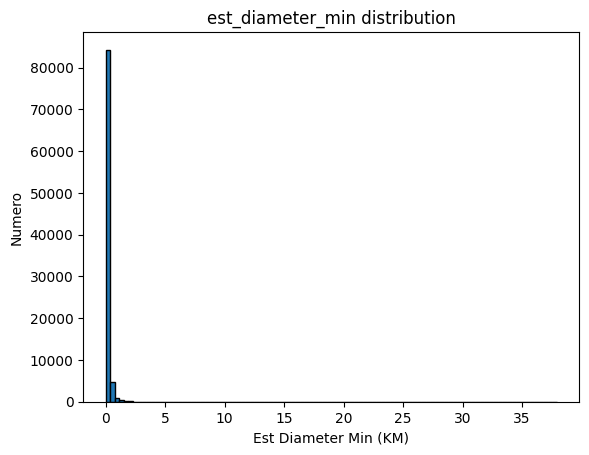

In [59]:
import matplotlib.pyplot as plt
plt.hist(df['est_diameter_min'], bins = 100, edgecolor = "black")
plt.title("est_diameter_min distribution")
plt.xlabel("Est Diameter Min (KM)")
plt.ylabel("Numero")
plt.show()

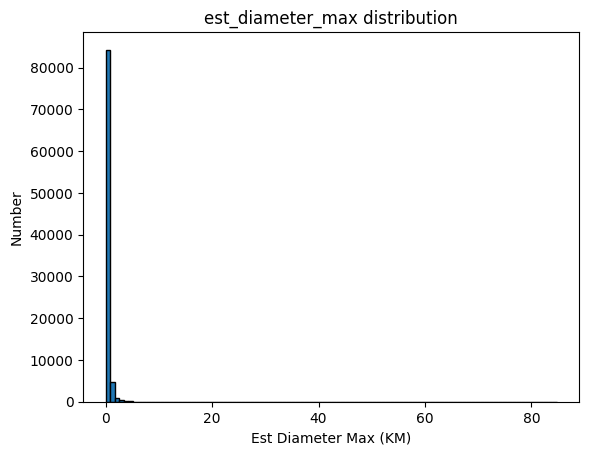

In [60]:
plt.hist(df['est_diameter_max'], bins = 100, edgecolor = "black")
plt.title("est_diameter_max distribution")
plt.xlabel("Est Diameter Max (KM)")
plt.ylabel("Number")
plt.show()

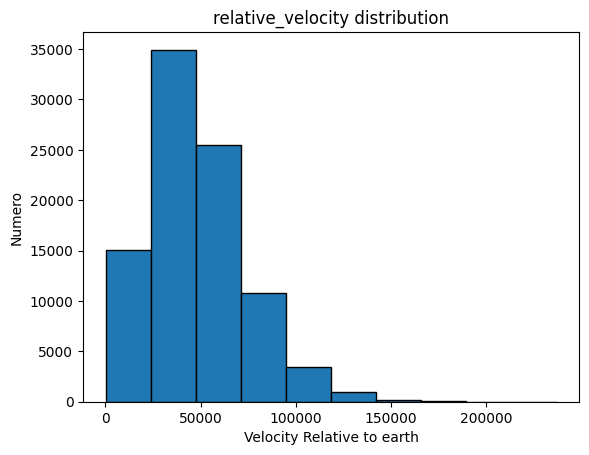

In [61]:
plt.hist(df['relative_velocity'], edgecolor = "black")
plt.title("relative_velocity distribution")
plt.xlabel("Velocity Relative to earth")
plt.ylabel("Numero")
plt.show()

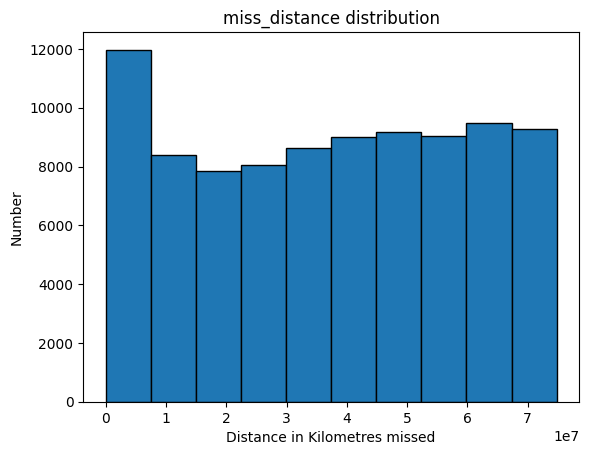

In [62]:
plt.hist(df['miss_distance'], edgecolor = "black")
plt.title("miss_distance distribution")
plt.xlabel("Distance in Kilometres missed")
plt.ylabel("Number")
plt.show()

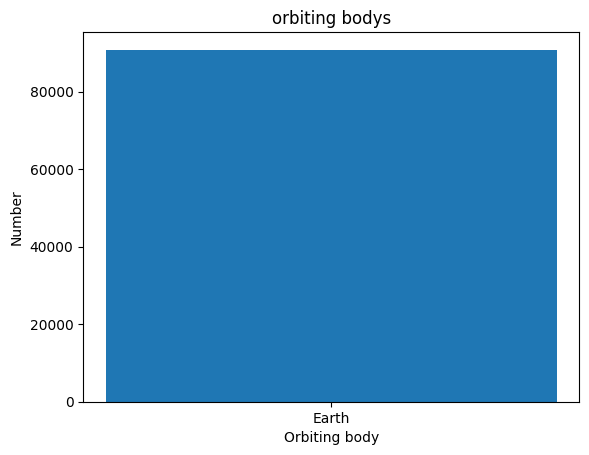

In [63]:
index = df['orbiting_body'].value_counts().index
values = df['orbiting_body'].value_counts().values
plt.bar(index, values)
plt.title("orbiting bodys")
plt.xlabel("Orbiting body")
plt.ylabel("Number")
plt.show()

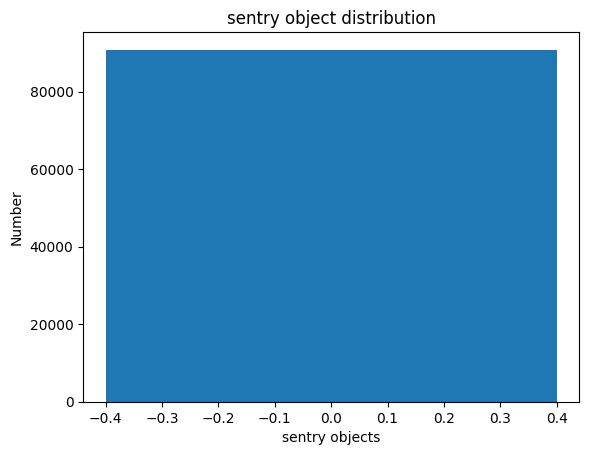

In [64]:

index = df['sentry_object'].value_counts().index
values = df['sentry_object'].value_counts().values
plt.bar(index, values)
plt.title("sentry object distribution")
plt.xlabel("sentry objects")
plt.ylabel("Number")
plt.show()

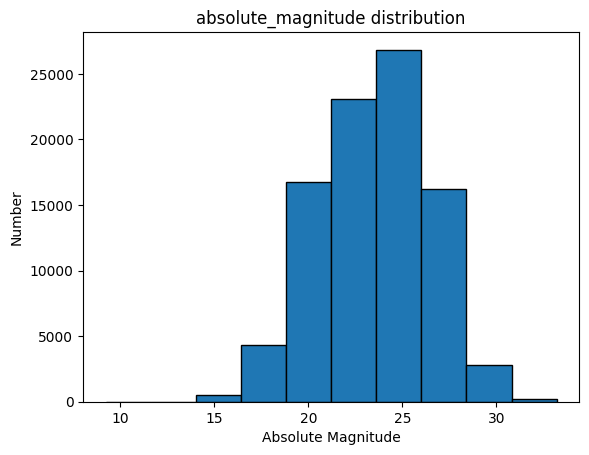

In [65]:
plt.hist(df['absolute_magnitude'],  edgecolor = "black")
plt.title("absolute_magnitude distribution")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Number")
plt.show()

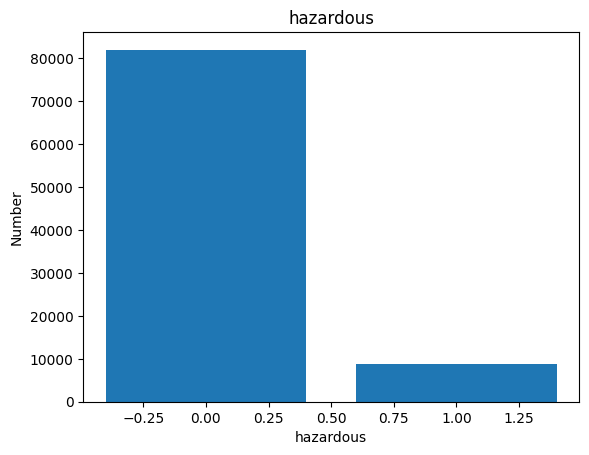

In [66]:
index = df['hazardous'].value_counts().index
values = df['hazardous'].value_counts().values
plt.bar(index, values)
plt.title("hazardous")
plt.xlabel("hazardous")
plt.ylabel("Number")
plt.show()

In [67]:
df2 = df.drop(["name","orbiting_body","sentry_object"], axis=1)
df2.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,,,,,,
2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
2277475,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2512244,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3596030,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
3667127,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_normalize =["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"]
df2[columns_to_normalize] = scaler.fit_transform(df2[columns_to_normalize])
df2.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,,,,,,
2162635,3.587284,3.587284,-1.363913,0.795153,-2.348632,False
2277475,0.463529,0.463529,1.009040,1.090357,-1.218735,True
2512244,1.991887,1.991887,2.616983,0.569624,-1.968544,False
3596030,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,False
3667127,0.427378,0.427378,-0.210697,0.412001,-1.187637,True


In [69]:
from sklearn.calibration import LabelEncoder


le = LabelEncoder()
df2["hazardous"] = le.fit_transform(df2["hazardous"])
df2.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,,,,,,
2162635,3.587284,3.587284,-1.363913,0.795153,-2.348632,0
2277475,0.463529,0.463529,1.009040,1.090357,-1.218735,1
2512244,1.991887,1.991887,2.616983,0.569624,-1.968544,0
3596030,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,0
3667127,0.427378,0.427378,-0.210697,0.412001,-1.187637,1


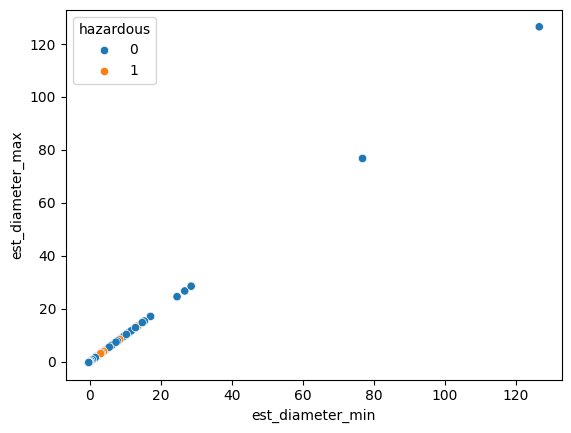

In [70]:
import seaborn as sns
sp1 = sns.scatterplot(x=df2["est_diameter_min"], y=df2["est_diameter_max"], hue = df2["hazardous"])

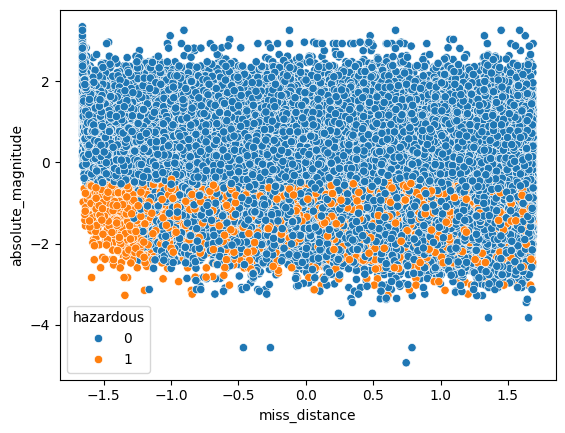

In [71]:
sp2 = sns.scatterplot(x=df2["miss_distance"], y=df2["absolute_magnitude"], hue = df2["hazardous"])

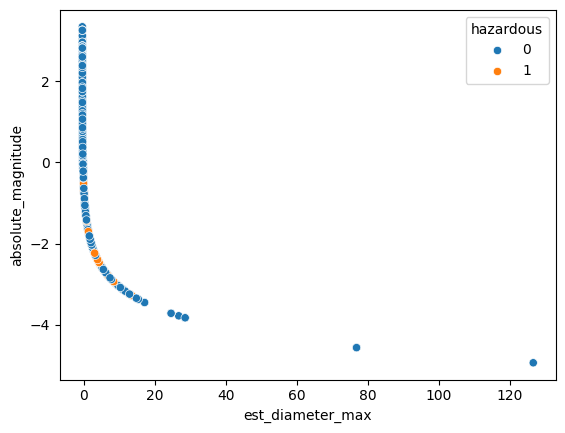

In [72]:
sp3 = sns.scatterplot(x=df2["est_diameter_max"], y=df2["absolute_magnitude"], hue = df2["hazardous"])

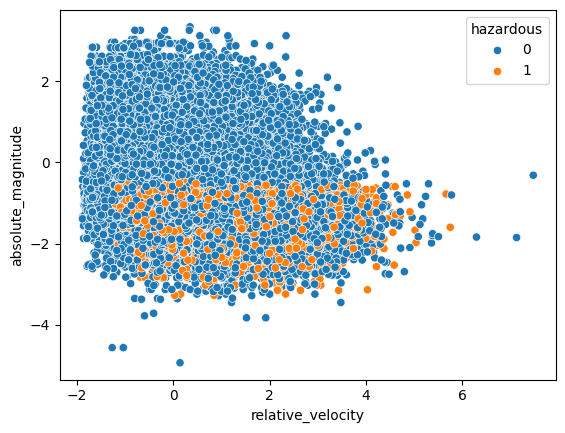

In [81]:
sp4 = sns.scatterplot(x=df2["relative_velocity"], y=df2["absolute_magnitude"], hue = df2["hazardous"])

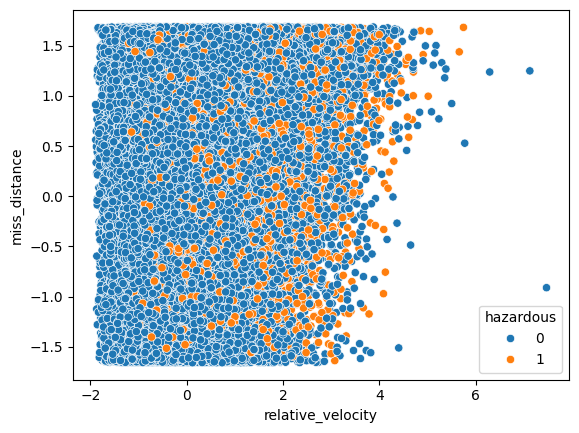

In [82]:
sp5 = sns.scatterplot(x=df2["relative_velocity"], y=df2["miss_distance"], hue = df2["hazardous"])

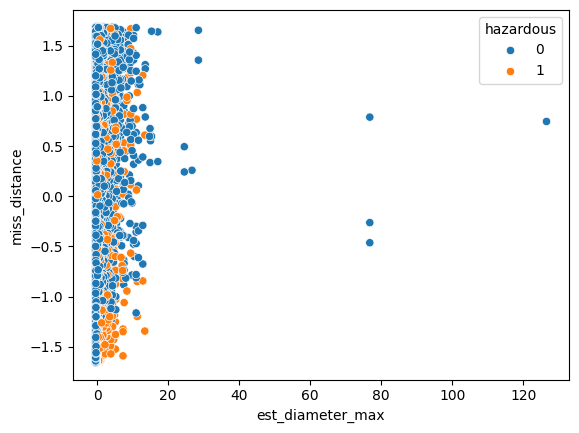

In [85]:
sp5 = sns.scatterplot(x=df2["est_diameter_max"], y=df2["miss_distance"], hue = df2["hazardous"])

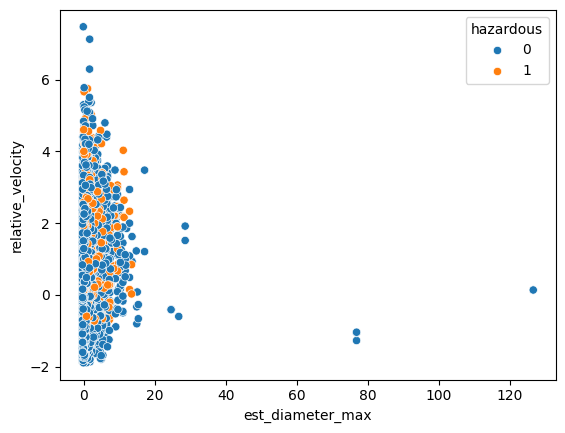

In [86]:
sp5 = sns.scatterplot(x=df2["est_diameter_max"], y=df2["relative_velocity"], hue = df2["hazardous"])

In [73]:
hazardous_df = df2[df2["hazardous"] == 1]
max_hazardous_magnitude = hazardous_df["absolute_magnitude"].max()
print("Max absolute magnitude for hazardous body: ", max_hazardous_magnitude)

Max absolute magnitude for hazardous body:  -0.3894527903893385


In [74]:
df_temp = df2.copy()
df_temp["absolute_magnitude"] = df_temp["absolute_magnitude"].apply(lambda x: x <= max_hazardous_magnitude)
df_temp["absolute_magnitude"] = le.fit_transform(df_temp["absolute_magnitude"])
df_temp.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,,,,,,
2162635,3.587284,3.587284,-1.363913,0.795153,1,0
2277475,0.463529,0.463529,1.009040,1.090357,1,1
2512244,1.991887,1.991887,2.616983,0.569624,1,0
3596030,-0.103601,-0.103601,-0.921301,-0.520384,1,0
3667127,0.427378,0.427378,-0.210697,0.412001,1,1


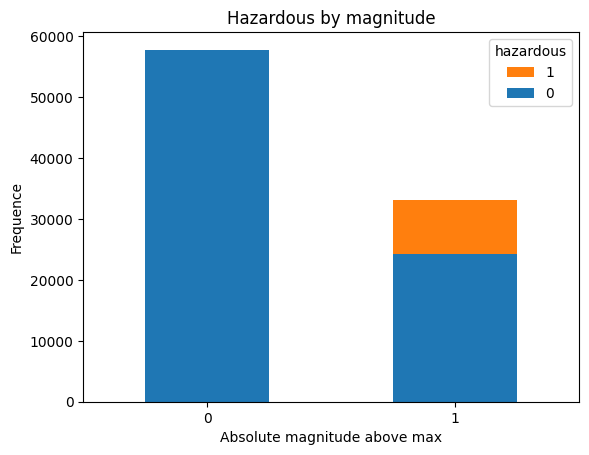

In [75]:
grouped = df_temp.groupby(['absolute_magnitude', 'hazardous']).size().unstack()

# Creiamo il grafico a barre stackato
ax = grouped.plot(kind='bar', stacked=True)

ax.set_title('Hazardous by magnitude')
ax.set_xlabel('Absolute magnitude above max')
ax.set_ylabel('Frequence')

# Rotazione delle labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Aggiungiamo una legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='hazardous')

plt.show()

## Split train-test

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2[columns_to_normalize], df2['hazardous'],
                                                    test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.25, random_state=42)


print("Train set size: ", X_train.shape)
print(y_train.value_counts()/y_train.count())

Train set size:  (54501, 5)
hazardous
0    0.901213
1    0.098787
Name: count, dtype: float64


In [77]:
print("Validation set size: ", X_val.shape)
print(y_val.value_counts()/y_val.count())

Validation set size:  (18167, 5)
hazardous
0    0.904938
1    0.095062
Name: count, dtype: float64


In [78]:
print("Test set size: ", X_test.shape)
print(y_test.value_counts()/y_test.count())

Test set size:  (18168, 5)
hazardous
0    0.904833
1    0.095167
Name: count, dtype: float64


## Baseline Model

Classifies all occurences as negative

In [79]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = np.zeros(y_val.shape)
cm = confusion_matrix(y_val, y_pred)
print("Confusion matrix:\n", cm)
accuracy = (accuracy_score(y_val, y_pred))
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=1)
f1 = f1_score(y_val, y_pred, zero_division=1)
print("\nAccuracy:", accuracy)
print("\nPrecision:",precision)
print("\nRecall:",recall)
print("\nF1-score:", f1)

Confusion matrix:
 [[16440     0]
 [ 1727     0]]

Accuracy: 0.9049375240821269

Precision: 0.0

Recall: 0.0

F1-score: 0.0


Classifies all occurences based on their magnitude

In [80]:
y_pred = (X_val["absolute_magnitude"] <= max_hazardous_magnitude).astype(int)
cm = confusion_matrix(y_val, y_pred)
print("Confusion matrix:\n", cm)
accuracy = (accuracy_score(y_val, y_pred))
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=1)
f1 = f1_score(y_val, y_pred, zero_division=1)
print("\nAccuracy:", accuracy)
print("\nPrecision:",precision)
print("\nRecall:",recall)
print("\nF1-score:", f1)


Confusion matrix:
 [[11636  4804]
 [    0  1727]]

Accuracy: 0.7355644850553201

Precision: 0.2644311743990201

Recall: 1.0

F1-score: 0.41826108016468877
